<h1 style='color:purple' align='center'>Data Science Regression Project: Predicting Land Prices in Colombo</h1>

Dataset is downloaded from here: https://www.kaggle.com/datasets/ruchiraayeshmantha/land-prices-of-colombo-district?resource=download

**Usages for data generations**

In [1]:
switch_dict = {
    'Agricultural': 1,
    'Commercial': 2,
    'Residential': 3,
    'Other': 4
}

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
matplotlib.rcParams["figure.figsize"] = (20,10)
pd.reset_option('display.float_format')
import requests


<h2 style='color:blue'>Data Load: Load Colombo land prices into a dataframe</h2>

In [3]:
df1 = pd.read_csv("datasets/P3_Data.csv")
df1.head()

,Address_ID,Address,Land_size(Perches),Price_Scale,Land_type,Posted_Date_new,Distance from fort,count_govtschools_A,min_dist_govtschools_a,count_govtschools_B,...,police_mdist,post_office_count,post_office_mdist,pharmacy_count,pharmacy_mdist,movie_theater_count,movie_theater_mdist,library_count,library_mdist,Air
0,12,nawala,22.0,per perch,"Commercial, Residential",9/21/2021,9.16,2,1.530830,12,...,1115,0,0,10,1899,1,1541,2,1425,124
1,16,mount lavinia,23.0,per perch,Residential,9/21/2021,12.89,0,2.727171,5,...,1642,3,1177,2,1751,0,0,0,0,119
2,12,nawala,22.0,per perch,"Commercial, Residential",9/21/2021,9.16,2,1.530830,12,...,864,0,0,10,1648,1,1290,2,1173,124
3,22,hokandara,11.0,total price,Residential,9/21/2021,16.39,0,4.673446,1,...,0,0,0,1,1045,0,0,0,0,122
4,6,battaramulla,20.0,per perch,Residential,9/21/2021,11.35,0,3.099786,3,...,1318,4,411,9,1953,0,0,3,1676,124


In [4]:
df1.shape

(3124, 78)

In [5]:
df1.columns

Index(['Address_ID', 'Address', 'Land_size(Perches)', 'Price_Scale',
       'Land_type', 'Posted_Date_new', 'Distance from fort',
       'count_govtschools_A', 'min_dist_govtschools_a', 'count_govtschools_B',
       'min_dist_govtschools_b', 'count_semigovtschools',
       'min_dist_semigovtschools', 'count_intlschools', 'min_dist_intlschools',
       'count_uni', 'min_dist_uni', 'min_dist_nearest_express',
       'min_dist_nearest_railway', 'min_dist_nearest_bank',
       'count_banks_within_2km', 'min_dist_nearest_FinanceCompany',
       'count_FinanceCompanies_within_2km', 'min_dist_nearest_Govt_Hospital',
       'count_Govt_Hospitals', 'min_dist_nearest_Pvt_Hospital',
       'count_Pvt_Hospital', 'min_dist_nearest_Pvt_Med_center',
       'count_Pvt_Med_Centers', 'min_dist_nearest_Supermarket',
       'count_Supermarkets_within2km', 'min_dist_nearest_Fuel_station',
       'count_Fuel_Stations_within2km', 'Mentioned Price(Rs)',
       'Price per Perch', 'latitude', 'longitude', 'bake

In [6]:
df1['Address'].unique()

array(['nawala', 'mount lavinia', 'hokandara', 'battaramulla', 'kaduwela',
       'thalawathugoda', 'athurugiriya', 'dehiwala', 'piliyandala',
       'madapatha', 'kesbewa', 'makandana', 'boralesgamuwa', 'kirulapone',
       'ranala', 'kahathuduwa', 'nugegoda', 'malabe', 'bope', 'pitakotte',
       'homagama', 'bomiriya', 'diyagama', 'maharagama'], dtype=object)

In [7]:
df1['Address'].value_counts()

Address
ranala            350
makandana         270
kaduwela          250
kesbewa           206
piliyandala       204
battaramulla      188
malabe            154
nugegoda          132
madapatha         125
thalawathugoda    122
bomiriya          121
nawala            111
bope              107
dehiwala          102
kahathuduwa        91
homagama           86
athurugiriya       85
mount lavinia      79
boralesgamuwa      59
pitakotte          58
maharagama         58
hokandara          57
diyagama           56
kirulapone         53
Name: count, dtype: int64

<h2 style='color:blue'>Data Filter: Filter based on data counts higher than 50 for each city name</h2>

In [8]:
# Assuming df1 is your DataFrame
address_counts = df1['Address'].value_counts()
filtered_addresses = address_counts[address_counts >= 50].index
filtered_df = df1[df1['Address'].isin(filtered_addresses)]
filtered_df['Address'].value_counts()
row_count = filtered_df.shape[0]
print("Number of rows:", row_count)
filtered_df['Address'].value_counts()



Number of rows: 3124


Address
ranala            350
makandana         270
kaduwela          250
kesbewa           206
piliyandala       204
battaramulla      188
malabe            154
nugegoda          132
madapatha         125
thalawathugoda    122
bomiriya          121
nawala            111
bope              107
dehiwala          102
kahathuduwa        91
homagama           86
athurugiriya       85
mount lavinia      79
boralesgamuwa      59
pitakotte          58
maharagama         58
hokandara          57
diyagama           56
kirulapone         53
Name: count, dtype: int64

**Drop features that are not required to build our model**

In [9]:
df2 = df1.drop(['Land_size(Perches)', 'Price_Scale', 'Distance from fort', 'Mentioned Price(Rs)'], axis='columns')
df2.shape

(3124, 74)

<h2 style='color:blue'>Data Cleaning</h2>

**Handle NA values**

In [10]:
df2.isnull().sum()

Address_ID             0
Address                0
Land_type              0
Posted_Date_new        0
count_govtschools_A    0
                      ..
movie_theater_count    0
movie_theater_mdist    0
library_count          0
library_mdist          0
Air                    0
Length: 74, dtype: int64

In [11]:
df2.shape

(3124, 74)

In [12]:
df3 = df2.dropna()
df3.isnull().sum()

Address_ID             0
Address                0
Land_type              0
Posted_Date_new        0
count_govtschools_A    0
                      ..
movie_theater_count    0
movie_theater_mdist    0
library_count          0
library_mdist          0
Air                    0
Length: 74, dtype: int64

In [13]:
df3.shape

(3124, 74)

In [14]:
df3.head()

,Address_ID,Address,Land_type,Posted_Date_new,count_govtschools_A,min_dist_govtschools_a,count_govtschools_B,min_dist_govtschools_b,count_semigovtschools,min_dist_semigovtschools,...,police_mdist,post_office_count,post_office_mdist,pharmacy_count,pharmacy_mdist,movie_theater_count,movie_theater_mdist,library_count,library_mdist,Air
0,12,nawala,"Commercial, Residential",9/21/2021,2,1.530830,12,0.863357,1,0.906167,...,1115,0,0,10,1899,1,1541,2,1425,124
1,16,mount lavinia,Residential,9/21/2021,0,2.727171,5,0.191582,2,0.581298,...,1642,3,1177,2,1751,0,0,0,0,119
2,12,nawala,"Commercial, Residential",9/21/2021,2,1.530830,12,0.863357,1,0.906167,...,864,0,0,10,1648,1,1290,2,1173,124
3,22,hokandara,Residential,9/21/2021,0,4.673446,1,0.386004,0,4.412525,...,0,0,0,1,1045,0,0,0,0,122
4,6,battaramulla,Residential,9/21/2021,0,3.099786,3,0.190254,0,3.899165,...,1318,4,411,9,1953,0,0,3,1676,124


<h2 style='color:blue'>Feature Engineering</h2>

**Method to check date type is correct**

In [15]:
def checkTypeDate(df, column_name):
    try:
        # Assuming 'Posted_Date_new' has the format 'mm/dd/yyyy'
        pd.to_datetime(df[column_name], format='%m/%d/%Y', errors='raise')
        
        print(f"Success: {column_name}")
        return True
    except ValueError as ve:
        # Specific handling for the ValueError when conversion fails
        print(f"Error: {column_name}, Error: {ve}")
        return False
    except Exception as e:
        # General handling for other exceptions
        print(f"Error: {column_name}, Unexpected Error: {e}")
        return False


In [16]:
checkTypeDate(df3, 'Posted_Date_new')

Success: Posted_Date_new


True

**Create a current month column**

In [17]:
def addMonth(val):
    try:
        parts = val.split('/')
        if len(parts) > 1:
            month = int(parts[0])
            if 0 < month < 13:
                return month
        return 7
    except:
        return 7

def addYear(val):
    try:
        parts = val.split('/')
        if len(parts[2]) == 4:
            year = int(parts[2])
            if 2020 <= year <= 2100:
                return year
        return 2023
    except:
        return 2023


In [18]:
df3['current_month'] = df3['Posted_Date_new'].apply(addMonth)
df3['current_year'] = df3['Posted_Date_new'].apply(addYear)
df3.head()

,Address_ID,Address,Land_type,Posted_Date_new,count_govtschools_A,min_dist_govtschools_a,count_govtschools_B,min_dist_govtschools_b,count_semigovtschools,min_dist_semigovtschools,...,post_office_mdist,pharmacy_count,pharmacy_mdist,movie_theater_count,movie_theater_mdist,library_count,library_mdist,Air,current_month,current_year
0,12,nawala,"Commercial, Residential",9/21/2021,2,1.530830,12,0.863357,1,0.906167,...,0,10,1899,1,1541,2,1425,124,9,2021
1,16,mount lavinia,Residential,9/21/2021,0,2.727171,5,0.191582,2,0.581298,...,1177,2,1751,0,0,0,0,119,9,2021
2,12,nawala,"Commercial, Residential",9/21/2021,2,1.530830,12,0.863357,1,0.906167,...,0,10,1648,1,1290,2,1173,124,9,2021
3,22,hokandara,Residential,9/21/2021,0,4.673446,1,0.386004,0,4.412525,...,0,1,1045,0,0,0,0,122,9,2021
4,6,battaramulla,Residential,9/21/2021,0,3.099786,3,0.190254,0,3.899165,...,411,9,1953,0,0,3,1676,124,9,2021


**Add Columns which help to predict the price range for next months**

**Below add_month_lowest_highest_columns method adding columns 'X_lowest', 'X_highest' for dataframe. it contains min max values for the month of that Address_ID**

In [19]:
import pandas as pd

def add_month_lowest_highest_columns(df):
    # Convert Posted_Date_new to datetime with dayfirst=True
    df['Date_new'] = pd.to_datetime(df['Posted_Date_new'], format='%m/%d/%Y', dayfirst=True)

    # Extract month from Posted_Date_new
    df['Month'] = df['Date_new'].dt.to_period('M')

    # Step 1: Group by Address_ID and Month
    grouped_address = df.groupby(['Address_ID', 'Month'])

    # Step 2: For each group, find the min and max values
    result = grouped_address.agg({'Price per Perch': ['min', 'max']}).reset_index()

    # Rename the columns to month_lowest and month_highest
    result.columns = ['Address_ID', 'Month', 'min', 'max']

    # Step 3: Merge the result DataFrame back to the original DataFrame
    df = pd.merge(df, result, on=['Address_ID', 'Month'], how='left')

    # Create a new column for the next month
    df['Next_Month'] = df['Month'].apply(lambda x: x + 1)

    # Step 4: Merge the result DataFrame for the next month back to the original DataFrame
    df = pd.merge(df, result, left_on=['Address_ID', 'Next_Month'], right_on=['Address_ID', 'Month'],
                  suffixes=('_current', '_next'), how='left')

    # Drop the Next_Month column if not needed
    df.drop(['Next_Month'], axis=1, inplace=True)

    return df

In [20]:
df3 = add_month_lowest_highest_columns(df3)

In [21]:
df3.drop(['Month_next', 'Month_current', 'Date_new'], axis='columns', inplace=True)
df3

,Address_ID,Address,Land_type,Posted_Date_new,count_govtschools_A,min_dist_govtschools_a,count_govtschools_B,min_dist_govtschools_b,count_semigovtschools,min_dist_semigovtschools,...,movie_theater_mdist,library_count,library_mdist,Air,current_month,current_year,min_current,max_current,min_next,max_next
0,12,nawala,"Commercial, Residential",9/21/2021,2,1.530830,12,0.863357,1,0.906167,...,1541,2,1425,124,9,2021,"13,700,000.00","8,500,000.00",NaN,NaN
1,16,mount lavinia,Residential,9/21/2021,0,2.727171,5,0.191582,2,0.581298,...,0,0,0,119,9,2021,"1,800,000.00","5,000,000.00",NaN,NaN
2,12,nawala,"Commercial, Residential",9/21/2021,2,1.530830,12,0.863357,1,0.906167,...,1290,2,1173,124,9,2021,"13,700,000.00","8,500,000.00",NaN,NaN
3,22,hokandara,Residential,9/21/2021,0,4.673446,1,0.386004,0,4.412525,...,0,0,0,122,9,2021,"1,060,000.00","980,000.00",NaN,NaN
4,6,battaramulla,Residential,9/21/2021,0,3.099786,3,0.190254,0,3.899165,...,0,3,1676,124,9,2021,"1,400,000.00","7,150,000.00",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3119,10,thalawathugoda,Residential,7/31/2021,0,3.947032,1,1.741785,0,3.685223,...,484,0,0,127,7,2021,"1,350,000.00","1,350,000.00","1,000,000.00","990,000.00"
3120,7,malabe,Residential,7/31/2021,0,6.499678,3,0.069944,0,6.892376,...,0,1,712,129,7,2021,"1,500,000.00","1,500,000.00","1,000,000.00","950,000.00"
3121,21,maharagama,Residential,7/31/2021,0,4.222295,4,0.369010,1,0.382122,...,1648,3,1236,126,7,2021,"1,550,000.00","1,550,000.00","1,000,000.00","800,000.00"
3122,16,mount lavinia,Residential,7/31/2021,0,2.727171,5,0.191582,2,0.581298,...,1081,0,0,126,7,2021,"3,000,000.00","3,000,000.00","1,600,000.00","3,200,000.00"


**Explore all features is floats**

In [22]:
def print_non_float_data(df, column_name):
    try:
        df[column_name].astype(float)
        print(f"Success: {column_name}")
        return True
    except ValueError as e:
        print(f"Error: {column_name}, Error: {e}")
        return False


In [23]:
excluded_columns = ['Address', 'Land_type', 'Posted_Date_new', 'latitude', 'longitude']

for col in df3.columns:
    if col not in excluded_columns:
        print_non_float_data(df3, col)

Success: Address_ID
Success: count_govtschools_A
Success: min_dist_govtschools_a
Success: count_govtschools_B
Success: min_dist_govtschools_b
Success: count_semigovtschools
Success: min_dist_semigovtschools
Success: count_intlschools
Success: min_dist_intlschools
Success: count_uni
Success: min_dist_uni
Success: min_dist_nearest_express
Success: min_dist_nearest_railway
Success: min_dist_nearest_bank
Success: count_banks_within_2km
Success: min_dist_nearest_FinanceCompany
Success: count_FinanceCompanies_within_2km
Success: min_dist_nearest_Govt_Hospital
Success: count_Govt_Hospitals
Success: min_dist_nearest_Pvt_Hospital
Success: count_Pvt_Hospital
Success: min_dist_nearest_Pvt_Med_center
Success: count_Pvt_Med_Centers
Success: min_dist_nearest_Supermarket
Success: count_Supermarkets_within2km
Success: min_dist_nearest_Fuel_station
Success: count_Fuel_Stations_within2km
Error: Price per Perch, Error: could not convert string to float: ' 6,500,000.00 '
Success: bakery_count
Success: bak

**Above shows that 'Price per Perch' can be '3,800,000.00'. For such case we can replace commace and spaces. Then can convert into float.**

**'Price per perch' feature transformation**

In [24]:
def transformtoPrices(value):
    try:
        return float(value.replace(' ', '').replace(',', ''))
    except:
        if pd.isna(value):
            return 0
        else: return value

In [25]:
df4 = df3.copy()
df4['Price per Perch'] = df3['Price per Perch'].apply(transformtoPrices)
print_non_float_data(df4, 'Price per Perch')

Success: Price per Perch


True

In [26]:
df4['min_current'] = df3['min_current'].apply(transformtoPrices)
print_non_float_data(df4, 'min_current')

Success: min_current


True

In [27]:
df4['max_current'] = df3['max_current'].apply(transformtoPrices)
print_non_float_data(df4, 'max_current')

Success: max_current


True

In [28]:
df4['min_next'] = df3['min_next'].apply(transformtoPrices)
print_non_float_data(df4, 'min_next')

Success: min_next


True

In [29]:
df4['max_next'] = df3['max_next'].apply(transformtoPrices)
print_non_float_data(df4, 'max_next')

Success: max_next


True

In [30]:
excluded_columns = ['Address', 'Land_type', 'Posted_Date_new', 'latitude', 'longitude']

for col in df4.columns:
    if col not in excluded_columns:
        print_non_float_data(df4, col)

Success: Address_ID
Success: count_govtschools_A
Success: min_dist_govtschools_a
Success: count_govtschools_B
Success: min_dist_govtschools_b
Success: count_semigovtschools
Success: min_dist_semigovtschools
Success: count_intlschools
Success: min_dist_intlschools
Success: count_uni
Success: min_dist_uni
Success: min_dist_nearest_express
Success: min_dist_nearest_railway
Success: min_dist_nearest_bank
Success: count_banks_within_2km
Success: min_dist_nearest_FinanceCompany
Success: count_FinanceCompanies_within_2km
Success: min_dist_nearest_Govt_Hospital
Success: count_Govt_Hospitals
Success: min_dist_nearest_Pvt_Hospital
Success: count_Pvt_Hospital
Success: min_dist_nearest_Pvt_Med_center
Success: count_Pvt_Med_Centers
Success: min_dist_nearest_Supermarket
Success: count_Supermarkets_within2km
Success: min_dist_nearest_Fuel_station
Success: count_Fuel_Stations_within2km
Success: Price per Perch
Success: bakery_count
Success: bakery_mdist
Success: bank_count
Success: bank_mdist
Success:

**For below row, it shows now data row how it is now**

In [31]:
df4.loc[30]

Address_ID                       4
Address                    kesbewa
Land_type              Residential
Posted_Date_new          9/20/2021
count_govtschools_A              0
                          ...     
current_year                  2021
min_current             1333333.33
max_current              989473.67
min_next                       0.0
max_next                       0.0
Name: 30, Length: 80, dtype: object

**Convert Land_type into a numeric value**

In [32]:
df4['Land_type'].unique()

array(['Commercial, Residential', 'Residential',
       'Commercial, Residential, Other', 'Commercial',
       'Residential, Other',
       'Agricultural, Commercial, Residential, Other',
       'Agricultural, Commercial, Residential', 'Commercial, Other',
       'Other', 'Agricultural, Residential',
       'Agricultural, Residential, Other', 'Agricultural, Commercial',
       'Agricultural'], dtype=object)

**From above result can see there can be few types of Land_types for a each land or one Land_type. So we can do something like that.Lets assign values like 1, 2, 3, 4 to each Land_type. And assign like below**

**lets assign Agricultural as 1, Commercial as 2, Residential as 3, Other as 4**

**Example: Land_type of A land='Agricultural, Commercial, Residential, Other'. So land_type will '1+2+3+4=10'**

In [33]:
switch_dict = {
    'Agricultural': 1,
    'Commercial': 2,
    'Residential': 3,
    'Other': 4
}

def landTypeValueGeneration(landType):
    landTypeValue = 0
    
    for key, value in switch_dict.items():
        if key in landType:
            landTypeValue+=value
            
    return landTypeValue    

In [34]:
df5 = df4.copy()
df5['Land_type'] = df5['Land_type'].apply(landTypeValueGeneration)
df5.head()

,Address_ID,Address,Land_type,Posted_Date_new,count_govtschools_A,min_dist_govtschools_a,count_govtschools_B,min_dist_govtschools_b,count_semigovtschools,min_dist_semigovtschools,...,movie_theater_mdist,library_count,library_mdist,Air,current_month,current_year,min_current,max_current,min_next,max_next
0,12,nawala,5,9/21/2021,2,1.530830,12,0.863357,1,0.906167,...,1541,2,1425,124,9,2021,13700000.0,8500000.0,0.0,0.0
1,16,mount lavinia,3,9/21/2021,0,2.727171,5,0.191582,2,0.581298,...,0,0,0,119,9,2021,1800000.0,5000000.0,0.0,0.0
2,12,nawala,5,9/21/2021,2,1.530830,12,0.863357,1,0.906167,...,1290,2,1173,124,9,2021,13700000.0,8500000.0,0.0,0.0
3,22,hokandara,3,9/21/2021,0,4.673446,1,0.386004,0,4.412525,...,0,0,0,122,9,2021,1060000.0,980000.0,0.0,0.0
4,6,battaramulla,3,9/21/2021,0,3.099786,3,0.190254,0,3.899165,...,0,3,1676,124,9,2021,1400000.0,7150000.0,0.0,0.0


In [35]:
df5['Land_type'].unique()

array([ 5,  3,  9,  2,  7, 10,  6,  4,  8,  1], dtype=int64)

In [36]:
df5.shape

(3124, 80)

In [37]:
df5.head(10)

,Address_ID,Address,Land_type,Posted_Date_new,count_govtschools_A,min_dist_govtschools_a,count_govtschools_B,min_dist_govtschools_b,count_semigovtschools,min_dist_semigovtschools,...,movie_theater_mdist,library_count,library_mdist,Air,current_month,current_year,min_current,max_current,min_next,max_next
0,12,nawala,5,9/21/2021,2,1.530830,12,0.863357,1,0.906167,...,1541,2,1425,124,9,2021,13700000.0,8500000.0,0.0,0.0
1,16,mount lavinia,3,9/21/2021,0,2.727171,5,0.191582,2,0.581298,...,0,0,0,119,9,2021,1800000.0,5000000.0,0.0,0.0
2,12,nawala,5,9/21/2021,2,1.530830,12,0.863357,1,0.906167,...,1290,2,1173,124,9,2021,13700000.0,8500000.0,0.0,0.0
3,22,hokandara,3,9/21/2021,0,4.673446,1,0.386004,0,4.412525,...,0,0,0,122,9,2021,1060000.0,980000.0,0.0,0.0
4,6,battaramulla,3,9/21/2021,0,3.099786,3,0.190254,0,3.899165,...,0,3,1676,124,9,2021,1400000.0,7150000.0,0.0,0.0
5,12,nawala,3,9/21/2021,2,1.530830,12,0.863357,1,0.906167,...,734,3,851,124,9,2021,13700000.0,8500000.0,0.0,0.0
6,3,kaduwela,3,9/21/2021,0,10.998007,2,0.686802,0,10.301645,...,1764,1,2401,125,9,2021,1200000.0,725000.0,0.0,0.0
7,10,thalawathugoda,3,9/21/2021,0,3.947032,1,1.741785,0,3.685223,...,846,1,1346,122,9,2021,1000000.0,9900000.0,0.0,0.0
8,17,athurugiriya,3,9/21/2021,0,5.178703,1,0.359089,0,3.821033,...,0,0,0,121,9,2021,1000000.0,987500.0,0.0,0.0
9,6,battaramulla,9,9/21/2021,0,3.099786,3,0.190254,0,3.899165,...,0,3,3,123,9,2021,1400000.0,7150000.0,0.0,0.0


<h2 style='color:blue'>Outlier Removal Using Standard Deviation and Mean</h2>

In [38]:
pd.options.display.float_format = '{:,.2f}'.format
df5['Price per Perch'].describe()

count        3,124.00
mean     1,617,908.38
std      2,167,740.68
min         30,000.00
25%        450,000.00
50%        890,000.00
75%      2,100,000.00
max     40,000,000.00
Name: Price per Perch, dtype: float64

In [39]:
df5.shape

(3124, 80)

**Here we find that min price per perch is 30,000.00 rs/sqft whereas max is 40,000,000.00, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation. This will remove some of outliers**

In [40]:
def replace_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('Address_ID'):
        m = np.mean(subdf['Price per Perch'])
        st = np.std(subdf['Price per Perch'])
        
        # Identify and replace outliers with the median value
        outliers = (subdf['Price per Perch'] < (m - st)) | (subdf['Price per Perch'] > (m + st))
        subdf.loc[outliers, 'Price per Perch'] = subdf['Price per Perch'].median()
        
        df_out = pd.concat([df_out, subdf], ignore_index=True)
    return df_out


pd.reset_option('display.float_format')
df6 = replace_pps_outliers(df5)
df6.head()

,Address_ID,Address,Land_type,Posted_Date_new,count_govtschools_A,min_dist_govtschools_a,count_govtschools_B,min_dist_govtschools_b,count_semigovtschools,min_dist_semigovtschools,...,movie_theater_mdist,library_count,library_mdist,Air,current_month,current_year,min_current,max_current,min_next,max_next
0,1,ranala,3,9/20/2021,0,11.681242,0,3.699442,0,8.071884,...,772,0,0,124,9,2021,275000.0,98425.2,0.0,0.0
1,1,ranala,3,9/20/2021,0,11.681242,0,3.699442,0,8.071884,...,0,0,0,125,9,2021,275000.0,98425.2,0.0,0.0
2,1,ranala,3,9/20/2021,0,11.681242,0,3.699442,0,8.071884,...,0,0,0,123,9,2021,275000.0,98425.2,0.0,0.0
3,1,ranala,7,9/20/2021,0,11.681242,0,3.699442,0,8.071884,...,0,0,0,124,9,2021,275000.0,98425.2,0.0,0.0
4,1,ranala,3,9/20/2021,0,11.681242,0,3.699442,0,8.071884,...,0,0,0,124,9,2021,275000.0,98425.2,0.0,0.0


In [41]:
# def remove_pps_outliers(df):
#     df_out = pd.DataFrame()
#     for key, subdf in df.groupby('Address_ID'):
#         m = np.mean(subdf['Price per Perch'])
#         st = np.std(subdf['Price per Perch'])
#         reduced_df = subdf[(subdf['Price per Perch']>(m-st)) & (subdf['Price per Perch']<=(m+st))]
#         df_out = pd.concat([df_out,reduced_df],ignore_index=True)
#     return df_out

# df7 = remove_pps_outliers(df5)
# df7.head()

In [42]:
df6['Land_type'].value_counts()
df6.head()


,Address_ID,Address,Land_type,Posted_Date_new,count_govtschools_A,min_dist_govtschools_a,count_govtschools_B,min_dist_govtschools_b,count_semigovtschools,min_dist_semigovtschools,...,movie_theater_mdist,library_count,library_mdist,Air,current_month,current_year,min_current,max_current,min_next,max_next
0,1,ranala,3,9/20/2021,0,11.681242,0,3.699442,0,8.071884,...,772,0,0,124,9,2021,275000.0,98425.2,0.0,0.0
1,1,ranala,3,9/20/2021,0,11.681242,0,3.699442,0,8.071884,...,0,0,0,125,9,2021,275000.0,98425.2,0.0,0.0
2,1,ranala,3,9/20/2021,0,11.681242,0,3.699442,0,8.071884,...,0,0,0,123,9,2021,275000.0,98425.2,0.0,0.0
3,1,ranala,7,9/20/2021,0,11.681242,0,3.699442,0,8.071884,...,0,0,0,124,9,2021,275000.0,98425.2,0.0,0.0
4,1,ranala,3,9/20/2021,0,11.681242,0,3.699442,0,8.071884,...,0,0,0,124,9,2021,275000.0,98425.2,0.0,0.0


In [43]:
df6['Address'].value_counts()

Address
ranala            350
makandana         270
kaduwela          250
kesbewa           206
piliyandala       204
battaramulla      188
malabe            154
nugegoda          132
madapatha         125
thalawathugoda    122
bomiriya          121
nawala            111
bope              107
dehiwala          102
kahathuduwa        91
homagama           86
athurugiriya       85
mount lavinia      79
boralesgamuwa      59
pitakotte          58
maharagama         58
hokandara          57
diyagama           56
kirulapone         53
Name: count, dtype: int64

**Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like**

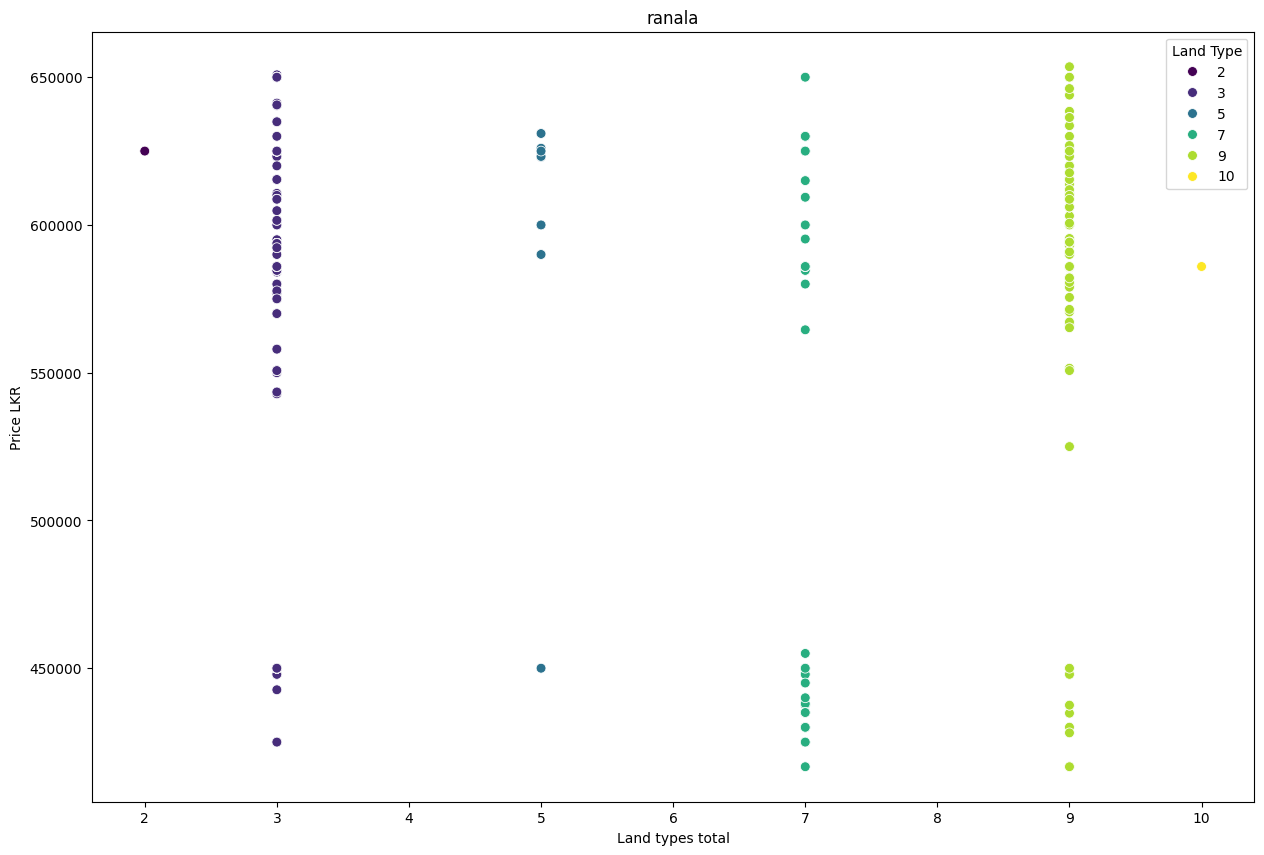

In [44]:
def plot_scatter_chart(df, location):
    plt.figure(figsize=(15, 10))

    # Select data for the specified location
    location_data = df[df['Address'] == location]

    # Use Seaborn's scatterplot to display all possible combinations
    sns.scatterplot(x='Land_type', y='Price per Perch', hue='Land_type', data=location_data, palette='viridis', s=50)

    plt.xlabel("Land types total")
    plt.ylabel("Price LKR")
    plt.title(location)
    plt.legend(title='Land Type')

    plt.show()
    
plot_scatter_chart(df6,"ranala")

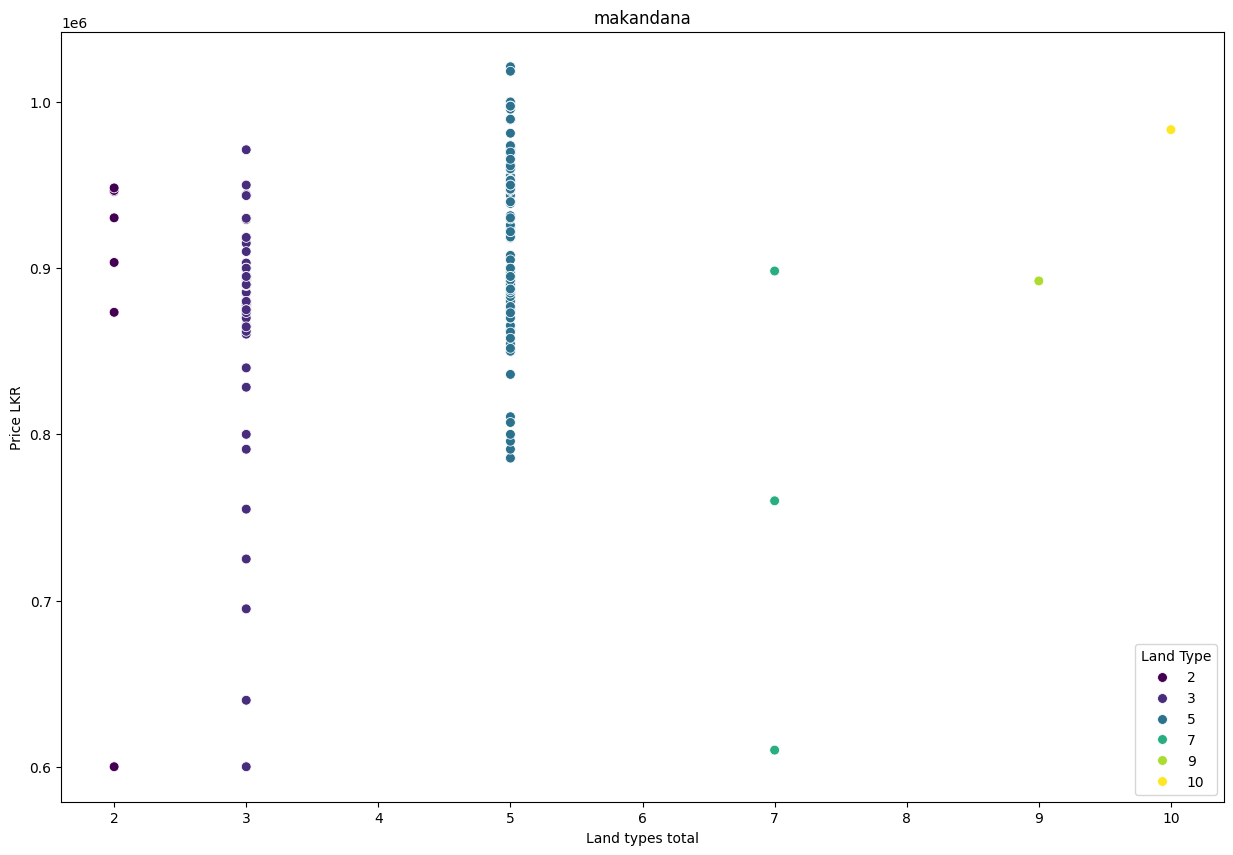

In [45]:
plot_scatter_chart(df6,"makandana")

In [46]:
address_data = df6[['Address', 'Address_ID']].drop_duplicates()
city_dict = dict(zip(address_data['Address_ID'], address_data['Address']))

import json
columns = {
    'city_dict': city_dict
}

with open("datasets/city_dict.json", "w") as f:
    f.write(json.dumps(columns))

<h2 style='color:blue'>Droping Columns which cant generate using longitude and latitude</h2>

In [47]:
df6.head()

,Address_ID,Address,Land_type,Posted_Date_new,count_govtschools_A,min_dist_govtschools_a,count_govtschools_B,min_dist_govtschools_b,count_semigovtschools,min_dist_semigovtschools,...,movie_theater_mdist,library_count,library_mdist,Air,current_month,current_year,min_current,max_current,min_next,max_next
0,1,ranala,3,9/20/2021,0,11.681242,0,3.699442,0,8.071884,...,772,0,0,124,9,2021,275000.0,98425.2,0.0,0.0
1,1,ranala,3,9/20/2021,0,11.681242,0,3.699442,0,8.071884,...,0,0,0,125,9,2021,275000.0,98425.2,0.0,0.0
2,1,ranala,3,9/20/2021,0,11.681242,0,3.699442,0,8.071884,...,0,0,0,123,9,2021,275000.0,98425.2,0.0,0.0
3,1,ranala,7,9/20/2021,0,11.681242,0,3.699442,0,8.071884,...,0,0,0,124,9,2021,275000.0,98425.2,0.0,0.0
4,1,ranala,3,9/20/2021,0,11.681242,0,3.699442,0,8.071884,...,0,0,0,124,9,2021,275000.0,98425.2,0.0,0.0


In [48]:
df6.columns

Index(['Address_ID', 'Address', 'Land_type', 'Posted_Date_new',
       'count_govtschools_A', 'min_dist_govtschools_a', 'count_govtschools_B',
       'min_dist_govtschools_b', 'count_semigovtschools',
       'min_dist_semigovtschools', 'count_intlschools', 'min_dist_intlschools',
       'count_uni', 'min_dist_uni', 'min_dist_nearest_express',
       'min_dist_nearest_railway', 'min_dist_nearest_bank',
       'count_banks_within_2km', 'min_dist_nearest_FinanceCompany',
       'count_FinanceCompanies_within_2km', 'min_dist_nearest_Govt_Hospital',
       'count_Govt_Hospitals', 'min_dist_nearest_Pvt_Hospital',
       'count_Pvt_Hospital', 'min_dist_nearest_Pvt_Med_center',
       'count_Pvt_Med_Centers', 'min_dist_nearest_Supermarket',
       'count_Supermarkets_within2km', 'min_dist_nearest_Fuel_station',
       'count_Fuel_Stations_within2km', 'Price per Perch', 'latitude',
       'longitude', 'bakery_count', 'bakery_mdist', 'bank_count', 'bank_mdist',
       'bar_count', 'bar_mdist', '

In [49]:
pd.options.display.float_format = '{:.15f}'.format
df7 =df6.drop(['Address_ID', 'Address', 'count_govtschools_A', 'min_dist_govtschools_a', 'count_govtschools_B',
       'min_dist_govtschools_b', 'count_semigovtschools',
       'min_dist_semigovtschools', 'count_intlschools', 'min_dist_intlschools',
       'count_uni', 'min_dist_uni', 'min_dist_nearest_express',
       'min_dist_nearest_railway', 'min_dist_nearest_bank',
       'count_banks_within_2km', 'min_dist_nearest_FinanceCompany',
       'count_FinanceCompanies_within_2km', 'min_dist_nearest_Govt_Hospital',
       'count_Govt_Hospitals', 'min_dist_nearest_Pvt_Hospital',
       'count_Pvt_Hospital', 'min_dist_nearest_Pvt_Med_center',
       'count_Pvt_Med_Centers', 'min_dist_nearest_Supermarket',
       'count_Supermarkets_within2km', 'min_dist_nearest_Fuel_station',
       'count_Fuel_Stations_within2km', 'max_current', 'min_current'], axis='columns')

# Display the DataFrame
df7.head()

,Land_type,Posted_Date_new,Price per Perch,latitude,longitude,bakery_count,bakery_mdist,bank_count,bank_mdist,bar_count,...,pharmacy_mdist,movie_theater_count,movie_theater_mdist,library_count,library_mdist,Air,current_month,current_year,min_next,max_next
0,3,9/20/2021,625000.000000000000000,6.916669694423810,80.022398512135794,6,945,2,684,0,...,1269,1,772,0,0,124,9,2021,0.000000000000000,0.000000000000000
1,3,9/20/2021,450000.000000000000000,6.922242120978898,80.028646950214565,2,1586,1,915,0,...,1043,0,0,0,0,125,9,2021,0.000000000000000,0.000000000000000
2,3,9/20/2021,450000.000000000000000,6.906866463052855,80.036604718179078,6,21,0,0,0,...,0,0,0,0,0,123,9,2021,0.000000000000000,0.000000000000000
3,7,9/20/2021,600000.000000000000000,6.924536355831947,80.025058542457145,6,891,2,817,1,...,711,0,0,0,0,124,9,2021,0.000000000000000,0.000000000000000
4,3,9/20/2021,600000.000000000000000,6.920455440986516,80.023331042228108,6,1104,2,1509,0,...,924,0,0,0,0,124,9,2021,0.000000000000000,0.000000000000000


In [50]:
df7 = df7.drop(['Posted_Date_new'], axis='columns')
pd.reset_option('display.float_format')
df7.head()

,Land_type,Price per Perch,latitude,longitude,bakery_count,bakery_mdist,bank_count,bank_mdist,bar_count,bar_mdist,...,pharmacy_mdist,movie_theater_count,movie_theater_mdist,library_count,library_mdist,Air,current_month,current_year,min_next,max_next
0,3,625000.0,6.916670,80.022399,6,945,2,684,0,0,...,1269,1,772,0,0,124,9,2021,0.0,0.0
1,3,450000.0,6.922242,80.028647,2,1586,1,915,0,0,...,1043,0,0,0,0,125,9,2021,0.0,0.0
2,3,450000.0,6.906866,80.036605,6,21,0,0,0,0,...,0,0,0,0,0,123,9,2021,0.0,0.0
3,7,600000.0,6.924536,80.025059,6,891,2,817,1,13256,...,711,0,0,0,0,124,9,2021,0.0,0.0
4,3,600000.0,6.920455,80.023331,6,1104,2,1509,0,0,...,924,0,0,0,0,124,9,2021,0.0,0.0


In [51]:
df7.shape

(3124, 49)

In [52]:
df7.isna().sum()
df7.head()

,Land_type,Price per Perch,latitude,longitude,bakery_count,bakery_mdist,bank_count,bank_mdist,bar_count,bar_mdist,...,pharmacy_mdist,movie_theater_count,movie_theater_mdist,library_count,library_mdist,Air,current_month,current_year,min_next,max_next
0,3,625000.0,6.916670,80.022399,6,945,2,684,0,0,...,1269,1,772,0,0,124,9,2021,0.0,0.0
1,3,450000.0,6.922242,80.028647,2,1586,1,915,0,0,...,1043,0,0,0,0,125,9,2021,0.0,0.0
2,3,450000.0,6.906866,80.036605,6,21,0,0,0,0,...,0,0,0,0,0,123,9,2021,0.0,0.0
3,7,600000.0,6.924536,80.025059,6,891,2,817,1,13256,...,711,0,0,0,0,124,9,2021,0.0,0.0
4,3,600000.0,6.920455,80.023331,6,1104,2,1509,0,0,...,924,0,0,0,0,124,9,2021,0.0,0.0


In [53]:
import pandas as pd

# Assuming df is your DataFrame
column_mapping = {
    'Price per Perch': 'price',
    'latitude': 'lat',
    'longitude': 'long',
    'current_month': 'curr_month',
    'current_year': 'curr_year',
    'min_next': 'min_next',
    'max_next': 'max_next'
}

# Rename the columns using the mapping dictionary
df7.rename(columns=column_mapping, inplace=True)

df7.to_csv("datasets/training.csv", index=False)
df7.columns

Index(['Land_type', 'price', 'lat', 'long', 'bakery_count', 'bakery_mdist',
       'bank_count', 'bank_mdist', 'bar_count', 'bar_mdist',
       'bus_station_count', 'bus_station_mdist', 'clothing_store_count',
       'clothing_store_mdist', 'doctor_count', 'doctor_mdist',
       'gas_station_count', 'gas_station_mdist', 'gym_count', 'gym_mdist',
       'hospital_count', 'hospital_mdist', 'university_count',
       'university_mdist', 'train_station_count', 'train_station_mdist',
       'supermarket_count', 'supermarket_mdist', 'store_count', 'store_mdist',
       'school_count', 'school_mdist', 'restaurant_count', 'restaurant_mdist',
       'police_count', 'police_mdist', 'post_office_count',
       'post_office_mdist', 'pharmacy_count', 'pharmacy_mdist',
       'movie_theater_count', 'movie_theater_mdist', 'library_count',
       'library_mdist', 'Air', 'curr_month', 'curr_year', 'min_next',
       'max_next'],
      dtype='object')

<h2 style='color:blue'>Create training and testing datasets</h2>

In [54]:
x = df7.drop(['price', 'min_next', 'max_next'],axis='columns')
x.head(3)

,Land_type,lat,long,bakery_count,bakery_mdist,bank_count,bank_mdist,bar_count,bar_mdist,bus_station_count,...,post_office_mdist,pharmacy_count,pharmacy_mdist,movie_theater_count,movie_theater_mdist,library_count,library_mdist,Air,curr_month,curr_year
0,3,6.916670,80.022399,6,945,2,684,0,0,0,...,1194,3,1269,1,772,0,0,124,9,2021
1,3,6.922242,80.028647,2,1586,1,915,0,0,0,...,1463,1,1043,0,0,0,0,125,9,2021
2,3,6.906866,80.036605,6,21,0,0,0,0,0,...,1240,0,0,0,0,0,0,123,9,2021


In [55]:
y = df7[['price', 'min_next', 'max_next']]
y.head(3)

,price,min_next,max_next
0,625000.0,0.0,0.0
1,450000.0,0.0,0.0
2,450000.0,0.0,0.0


In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=400)

<h2 style='color:blue'>Build LinearRegression testing Model Now...</h2>

In [57]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.5346373008902383

<h2 style='color:blue'>Use K Fold cross validation to measure accuracy of our LinearRegression model</h2>

In [58]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.56266837, 0.51666605, 0.5538812 , 0.51270631, 0.54303195])

**We can see that in 5 iterations we get a score above 75% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose**

<h2 style='color:blue'>Find best model using GridSearchCV</h2>

In [59]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {}
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['friedman_mse', 'poisson', 'absolute_error', 'squared_error'],
                'splitter': ['best','random']
            }
        },
        # 'mlp_regressor': {
        #     'model': MLPRegressor(),
        #     'params': {
        #         'hidden_layer_sizes': [(50), (100), (50, 50)],
        #         'activation': ['relu', 'tanh'],
        #         'solver': ['adam', 'lbfgs'],
        #         'alpha': [0.0001, 0.001, 0.01],
        #         'learning_rate': ['constant', 'invscaling', 'adaptive']
        #     }
        # }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

c:\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.534e+12, tolerance: 1.709e+12
  model = cd_fast.enet_coordinate_descent(
c:\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.922e+12, tolerance: 1.764e+12
  model = cd_fast.enet_coordinate_descent(


,model,best_score,best_params
0,linear_regression,0.537791,{}
1,lasso,0.537791,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.827834,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


**Based on above results we can say that decision_tree gives the best score. Hence we will use that.**

<h2 style='color:blue'>Build a DecisionTree Model Now...</h2>


In [62]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import pandas as pd

params = {
    'criterion': 'friedman_mse',
    'splitter': 'best'
}

for i, (col, dtype) in enumerate(zip(X_train.columns, X_train.dtypes)):
    print(f', "{col}"')

decision_tree_model = DecisionTreeRegressor(**params)

# Fit the model to training data
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pd.DataFrame(decision_tree_model.predict(X_test), columns=y_test.columns)

# Evaluate the model for each column
mse_values = {}
mape_values = {}

for column in y_test.columns:
    mse = mean_squared_error(y_test[column], y_pred[column])
    mape = mean_absolute_percentage_error(y_test[column], y_pred[column])

    mse_values[column] = mse
    mape_values[column] = mape

    print(f'Mean Squared Error ({column}): {mse}')
    print(f'Mean Absolute Percentage Error ({column}): {mape}%')

# Overall metrics
print(f'Overall Mean Squared Error: {sum(mse_values.values()) / len(mse_values)}')
print(f'Overall Mean Absolute Percentage Error: {sum(mape_values.values()) / len(mape_values)}%')


, "Land_type"
, "lat"
, "long"
, "bakery_count"
, "bakery_mdist"
, "bank_count"
, "bank_mdist"
, "bar_count"
, "bar_mdist"
, "bus_station_count"
, "bus_station_mdist"
, "clothing_store_count"
, "clothing_store_mdist"
, "doctor_count"
, "doctor_mdist"
, "gas_station_count"
, "gas_station_mdist"
, "gym_count"
, "gym_mdist"
, "hospital_count"
, "hospital_mdist"
, "university_count"
, "university_mdist"
, "train_station_count"
, "train_station_mdist"
, "supermarket_count"
, "supermarket_mdist"
, "store_count"
, "store_mdist"
, "school_count"
, "school_mdist"
, "restaurant_count"
, "restaurant_mdist"
, "police_count"
, "police_mdist"
, "post_office_count"
, "post_office_mdist"
, "pharmacy_count"
, "pharmacy_mdist"
, "movie_theater_count"
, "movie_theater_mdist"
, "library_count"
, "library_mdist"
, "Air"
, "curr_month"
, "curr_year"
training ...........
predicting ...........
Mean Squared Error (price): 627611100728.7238
Mean Absolute Percentage Error (price): 0.25137219712645786%
Mean Squa

In [63]:
y_test.head()

,price,min_next,max_next
2303,2800000.0,0.00,0.0
1752,3575000.0,2092050.21,6500000.0
1716,3575000.0,2092050.21,6500000.0
2795,1500000.0,0.00,0.0
1840,400000.0,350000.00,795000.0


In [64]:
y_pred.head()

,price,min_next,max_next
0,3700000.0,0.00,0.0
1,3575000.0,2092050.21,6500000.0
2,3600000.0,2092050.21,6500000.0
3,2300000.0,0.00,0.0
4,430000.0,350000.00,795000.0


<h2 style='color:blue'>Export the tested model to a pickle file</h2>

In [65]:
import pickle
with open('Model.pickle','wb') as f:
    pickle.dump(decision_tree_model,f)

<h2 style='color:blue'>Export location and column information to a file that will be useful later on in our prediction application</h2>

In [68]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("datasets/columns.json","w") as f:
    f.write(json.dumps(columns))